In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

C:\Users\johbr\AppData\Local\Temp\ipykernel_28404\1611306976.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
# import data
df = pd.read_csv("../resources/ames_housing_data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# display numerical features
df_num = df.select_dtypes(include=["float64", "int64"])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Data Preprocessing

In [4]:
# fill missing values with the mean for each numerical feature
df = df.fillna(df_num.mean())

In [5]:
# drop 'Id'
df = df.drop("Id", axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# get_dummies for categorical data
dummies = pd.get_dummies(df)
dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.475241
GarageYrBlt              0.470177
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
LotFrontage              0.334901
MasVnrType_Sto

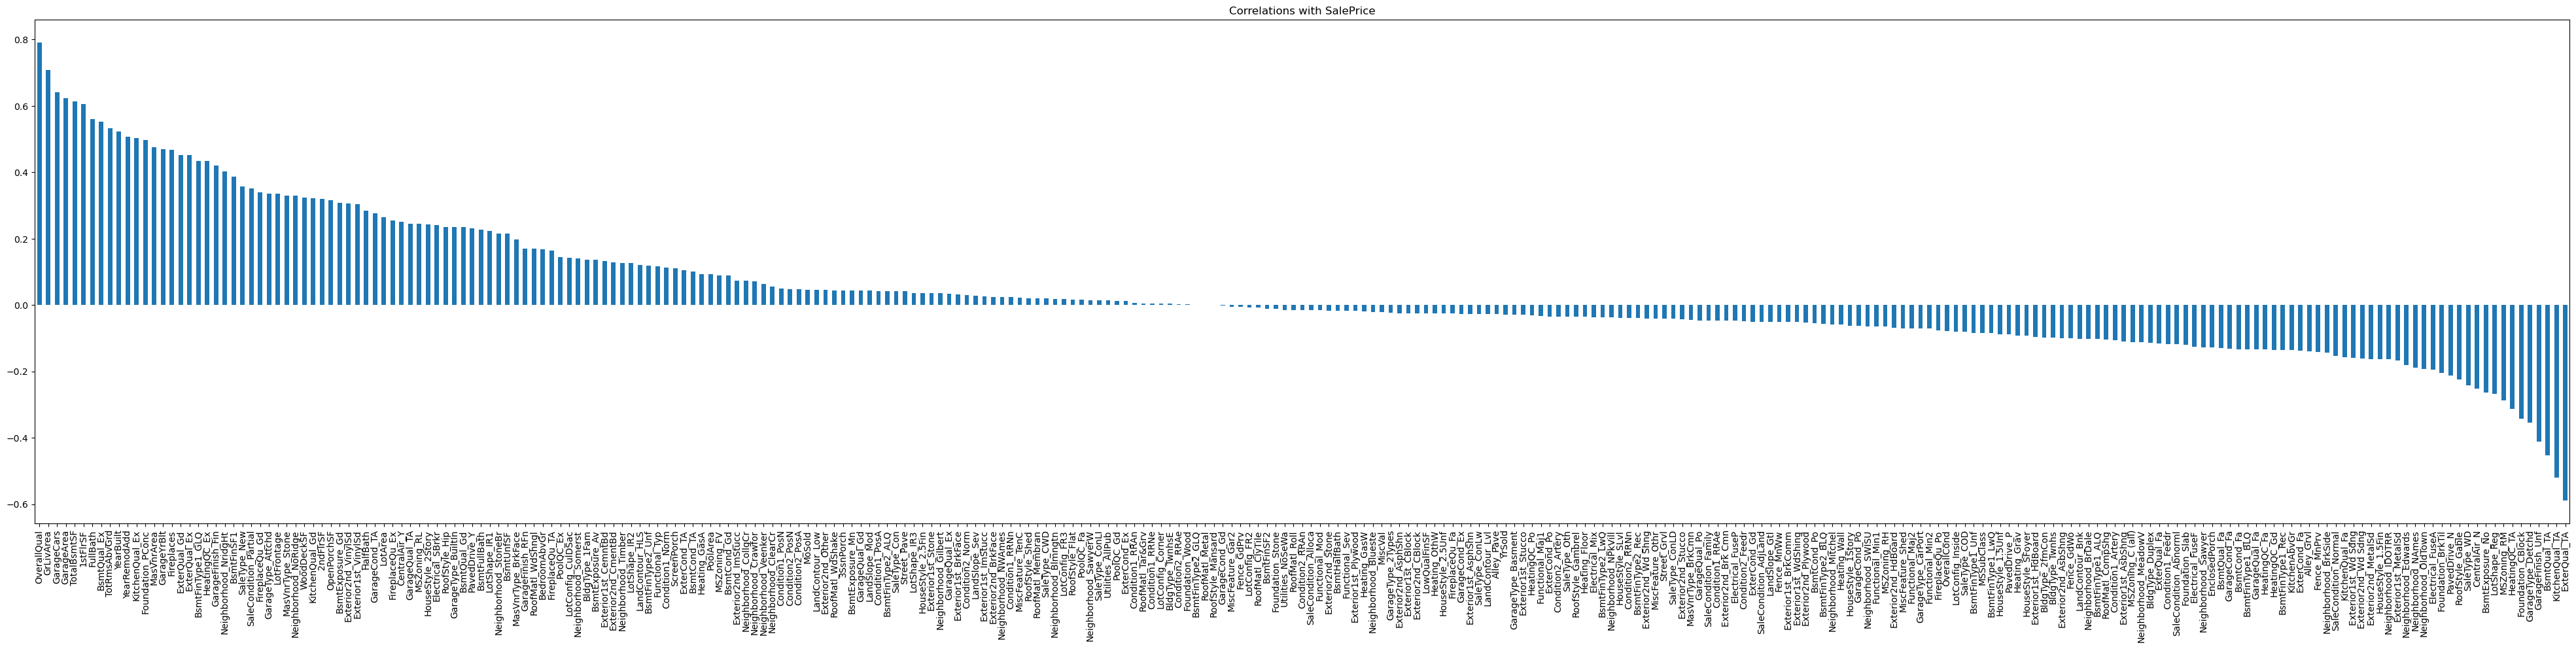

<Figure size 4000x1000 with 0 Axes>

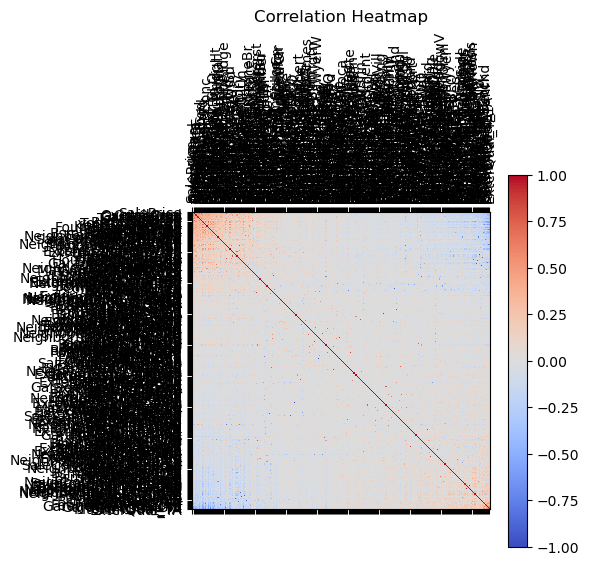

In [7]:
# calculate correlations
correlations = dummies.corr()['SalePrice'].sort_values(ascending=False)

# disable pandas display truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# print correlations
print(correlations)

# reset pandas truncation
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# plot correlations bar chart
plt.figure(figsize=(50, 10))
correlations.drop('SalePrice').plot(kind='bar')
plt.title('Correlations with SalePrice')
plt.show()

# convert correlations to a DataFrame for the heatmap
correlations_df = dummies[correlations.index].corr()

# plot a heatmap of correlations
plt.figure(figsize=(40, 10))
plt.matshow(correlations_df, cmap='coolwarm')
plt.xticks(range(len(correlations_df.columns)), correlations_df.columns, rotation=90)
plt.yticks(range(len(correlations_df.columns)), correlations_df.columns)
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# split data into target and features
y = dummies.SalePrice.values
X = dummies.drop(columns="SalePrice").values

# split data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

# scale the data
scaler = StandardScaler()

# fit the scaler only to the training data
# to prevent data leakage (e.g., mean and standard deviation not modified by X_test and X_val)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# df just to plot the data immediately below
scaled_df = pd.DataFrame(X_train, columns=dummies.drop(columns="SalePrice").columns)

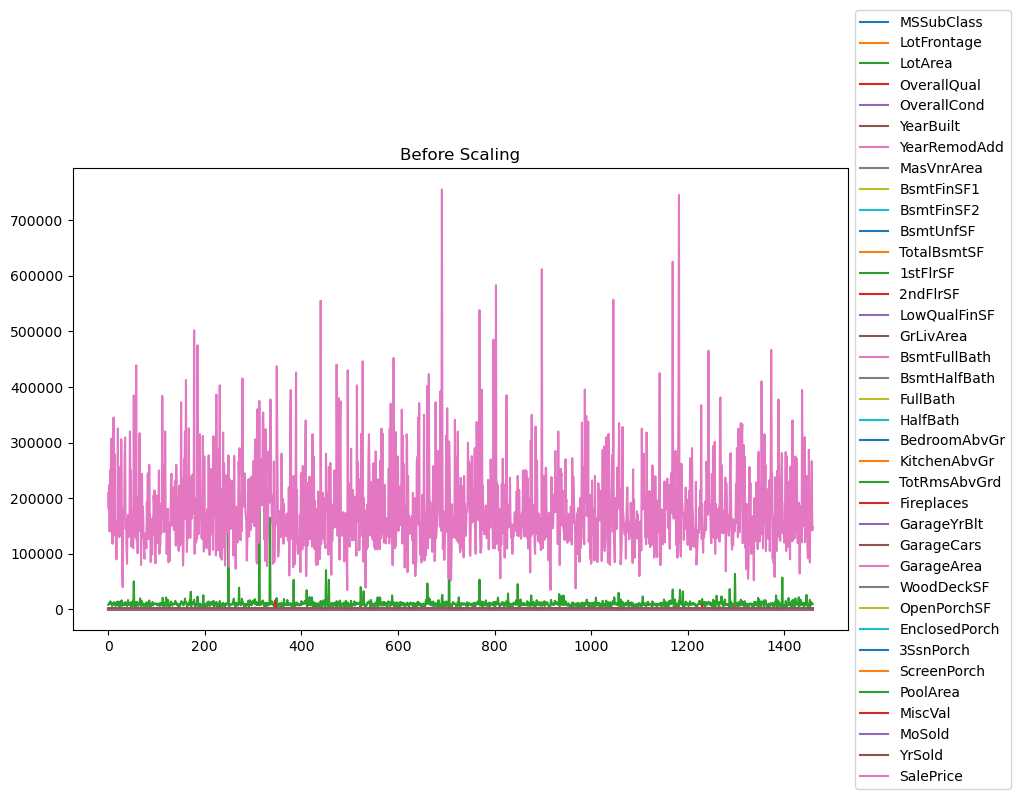

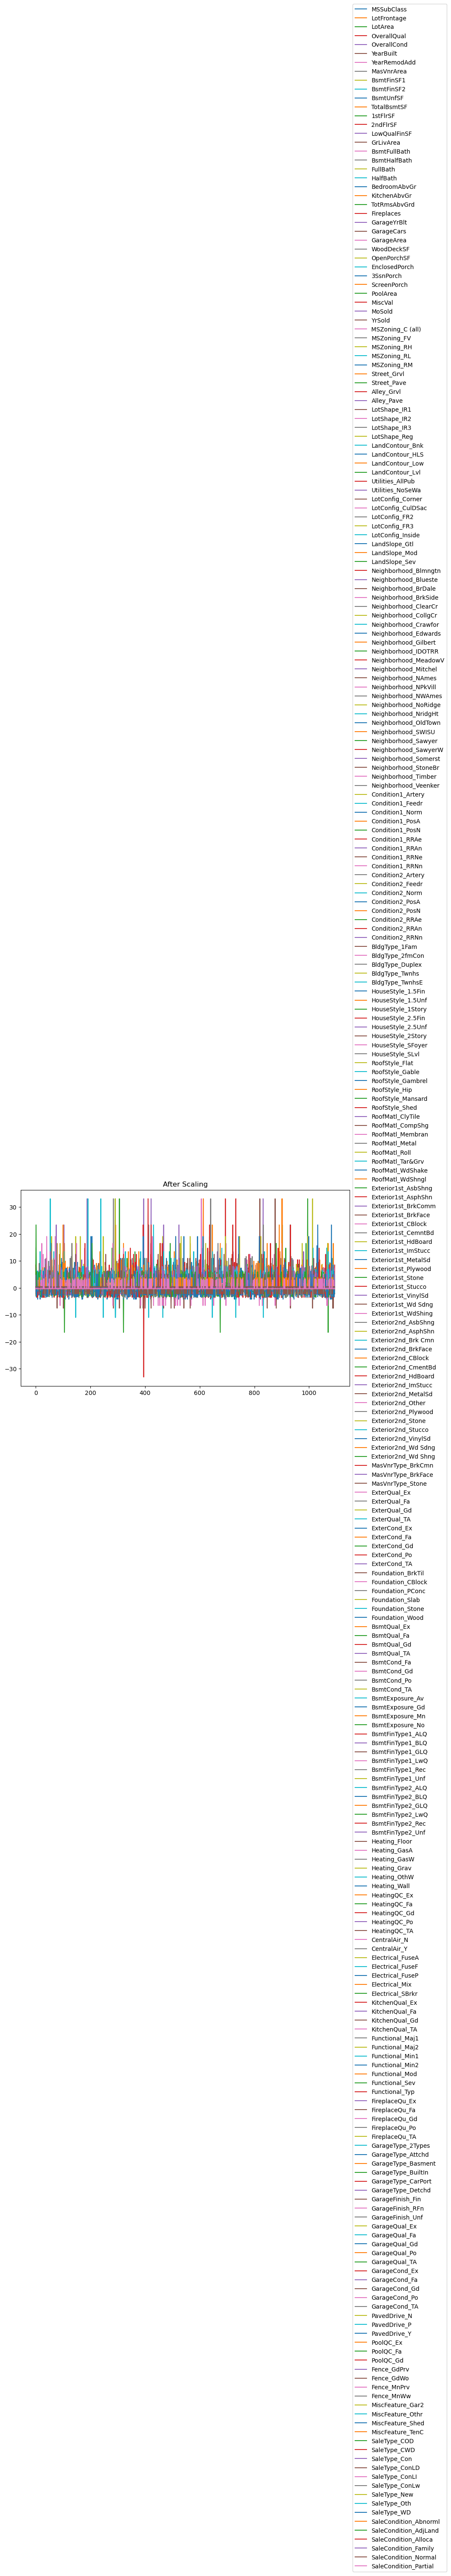

In [10]:
# plot data before scaling
dummies.plot(title='Before Scaling', figsize=(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# after scaling
scaled_df.plot(title='After Scaling', figsize=(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Compile, Train, Evaluate the Model

In [11]:
# build keras-tuner function
def build_model(hp):
    nn_test = tf.keras.models.Sequential()

    # adds a range of 1 to 5 dense layers, allowable number of neurons (adjust based on features), activation functions
    for i in range(hp.Int("num_layers", min_value=1, max_value=5, step=1)):
        nn_test.add(
            tf.keras.layers.Dense(
                units=hp.Int(f"layer{i}", min_value=50, max_value=600, step=50),
                input_dim=len(X_train[0]),
                activation=hp.Choice(f"activation{i}", values=["relu", "tanh", "LeakyReLU"])
            )
        )

    # add final layer
    nn_test.add(tf.keras.layers.Dense(units=1, activation="linear"))

    # compile the model
    nn_test.compile(
        loss="mean_absolute_error",
        optimizer="adam",
        metrics=["mae"],
    )

    return nn_test

In [12]:

# define tuner / call the build_model function
tuner = RandomSearch(build_model, objective="mae", max_trials=10, overwrite=True)

# run the damn thing
tuner.search(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val, y_val),
)

Trial 10 Complete [00h 00m 22s]
mae: 23672.63671875

Best mae So Far: 3195.4638671875
Total elapsed time: 00h 03m 34s


In [13]:
# summary of results
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="mae", direction="min")

Trial 02 summary
Hyperparameters:
num_layers: 5
layer0: 150
activation0: LeakyReLU
layer1: 150
activation1: tanh
layer2: 600
activation2: relu
layer3: 350
activation3: relu
layer4: 50
activation4: relu
Score: 3195.4638671875

Trial 00 summary
Hyperparameters:
num_layers: 4
layer0: 250
activation0: relu
layer1: 50
activation1: relu
layer2: 50
activation2: relu
layer3: 50
activation3: relu
Score: 4205.28857421875

Trial 05 summary
Hyperparameters:
num_layers: 2
layer0: 550
activation0: relu
layer1: 300
activation1: LeakyReLU
layer2: 50
activation2: tanh
layer3: 100
activation3: relu
layer4: 350
activation4: LeakyReLU
Score: 7630.25634765625

Trial 06 summary
Hyperparameters:
num_layers: 5
layer0: 300
activation0: tanh
layer1: 500
activation1: tanh
layer2: 200
activation2: tanh
layer3: 150
activation3: relu
layer4: 550
activation4: LeakyReLU
Score: 11438.396484375

Trial 08 summary

In [14]:
# get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# build that model
nn = tuner.hypermodel.build(best_hps)

# add early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# train the model
fit_model = nn.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
)

Epoch 1/100
35/35 [==============================] - 2s 12ms/step - loss: 181078.5625 - mae: 181078.5625 - val_loss: 179876.1406 - val_mae: 179876.1406
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 152097.8281 - mae: 152097.8281 - val_loss: 96094.1953 - val_mae: 96094.1953
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 61262.3633 - mae: 61262.3633 - val_loss: 55713.9570 - val_mae: 55713.9570
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 44994.3672 - mae: 44994.3672 - val_loss: 43995.2070 - val_mae: 43995.2070
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 35865.1641 - mae: 35865.1641 - val_loss: 38651.0312 - val_mae: 38651.0312
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 31483.5000 - mae: 31483.5000 - val_loss: 35849.0586 - val_mae: 35849.0586
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 26800.6914 - mae: 26800.6914 - val_los

In [15]:
print("Best Hyperparameters:")
print(best_hps.values)

Best Hyperparameters:
{'num_layers': 5, 'layer0': 150, 'activation0': 'LeakyReLU', 'layer1': 150, 'activation1': 'tanh', 'layer2': 600, 'activation2': 'relu', 'layer3': 350, 'activation3': 'relu', 'layer4': 50, 'activation4': 'relu'}


In [16]:
# summarize final model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               43200     
                                                                 
 dense_5 (Dense)             (None, 150)               22650     
                                                                 
 dense_6 (Dense)             (None, 600)               90600     
                                                                 
 dense_7 (Dense)             (None, 350)               210350    
                                                                 
 dense_8 (Dense)             (None, 50)                17550     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 384401 (1.47 MB)
Trainable params: 38440

In [17]:
# print weights, just because
all_weights = nn.get_weights()
for i, layer_weights in enumerate(all_weights):
    print(f"Layer {i} Weights:")
    print(layer_weights)

Layer 0 Weights:
[[-0.01459021  0.04565021  0.07099978 ... -0.05810056 -0.07537998
  -0.04863615]
 [-0.0062885  -0.08667371  0.04387812 ... -0.02961687 -0.01435299
   0.03023081]
 [ 0.08095217  0.0811037   0.08153319 ...  0.1399398  -0.03909696
   0.14576437]
 ...
 [-0.08043594  0.05254769 -0.0140611  ... -0.08836294  0.07694107
   0.05673881]
 [ 0.12023892  0.00023021  0.10322056 ...  0.06689394  0.06667298
   0.09231836]
 [-0.04153575  0.12439065 -0.01464935 ... -0.03717118  0.12696554
   0.03822773]]
Layer 1 Weights:
[ 0.05616947 -0.0356044   0.03322227  0.04155919  0.03517173  0.11871179
 -0.08576132  0.08884172  0.025419    0.04337278 -0.01032538  0.02945369
 -0.06633501  0.08591309  0.10717417  0.11027005  0.06988591  0.05297952
  0.01966368  0.04839946  0.1998231   0.15608062  0.06406797  0.11431111
  0.16448693 -0.07307293 -0.0457101   0.14607596  0.02096411 -0.01822725
 -0.0157992   0.10283561  0.07748839  0.14061724 -0.00046365  0.07733579
 -0.01612499  0.16261135  0.12780282

In [18]:
# revert scaled data for testing predictions
y_test_pred=nn.predict(X_test)

6/6 [==============================] - 0s 3ms/step


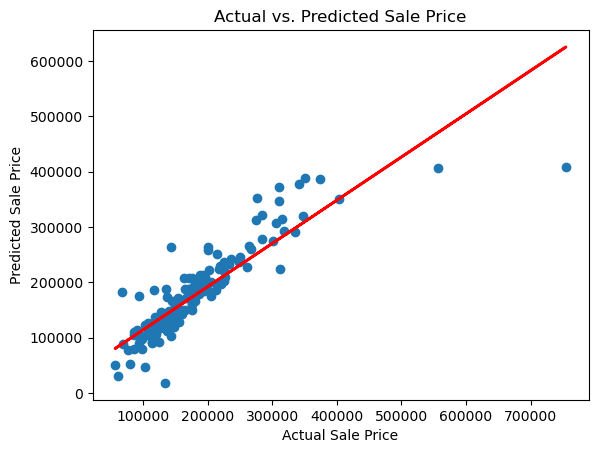

In [19]:
# Scatter plot for actual vs. predicted Sale Price
plt.scatter(y_test, y_test_pred.flatten())
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price")

# Add a line of best fit
fit = np.polyfit(y_test.flatten(), y_test_pred.flatten(), 1)
line = np.poly1d(fit)
plt.plot(y_test.flatten(), line(y_test.flatten()), color="red", linewidth=2)

plt.show()

In [20]:
# print the r_squared
print(f"R-squared: {r2_score(y_test, y_test_pred)}")

# and other metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Mean Percentage Error: {np.mean((y_test - y_test_pred) / y_test) * 100}")

R-squared: 0.7763648715547619
Mean Squared Error: 1511779944.7710364
Mean Absolute Error: 20494.685151980873
Mean Percentage Error: -15.47209527564637


In [21]:
# predict a baseline
# essentially, set every value to the mean and create a fake list of predictions
# compare to above model's predictions
baseline_prediction = y_train.mean()

# create array of baseline predictions with the length of y_test
baseline_predictions = [baseline_prediction] * len(y_test)

print(f"Baseline R-squared: {r2_score(y_test, baseline_predictions)}")
print(
    f"Baseline Mean Squared Error: {mean_squared_error(y_test, baseline_predictions)}"
)
print(
    f"Baseline Mean Absolute Error: {mean_absolute_error(y_test, baseline_predictions)}"
)
print(
    f"Mean Percentage Error: {np.mean((y_test - baseline_predictions) / y_test) * 100}"
)

Baseline R-squared: -0.010902447725085196
Baseline Mean Squared Error: 6833729822.392203
Baseline Mean Absolute Error: 57152.301709209765
Mean Percentage Error: -22.19893036395673


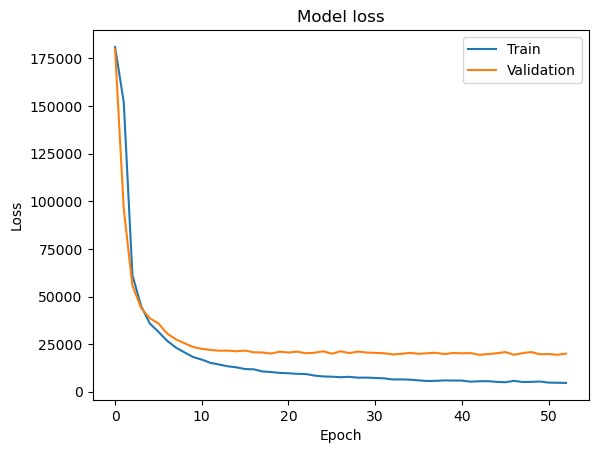

In [22]:
# plot training & validation loss values
# hopefully these both drop quickly and stabilize
# if not...
# validation loss up and training down? overfitting
# training and validation high? underfitting
plt.plot(fit_model.history["loss"])
plt.plot(fit_model.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

6/6 [==============================] - 0s 2ms/step


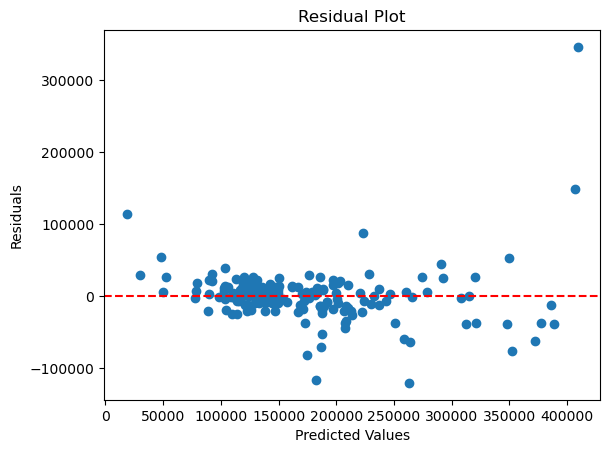

In [23]:
# residual plot
# difference between actual and predicted values
# you want there to be a rnadom distribution around the red line, zero
residuals = y_test - nn.predict(X_test).flatten()
plt.scatter(nn.predict(X_test).flatten(), residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

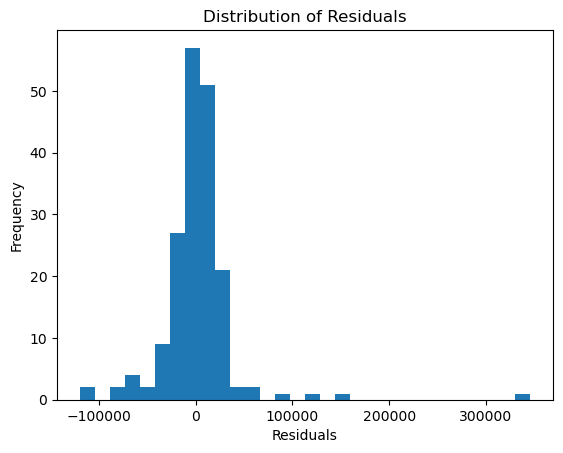

In [24]:
# distribution of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

## Random Forest

In [25]:
# create random forest model
rf = RandomForestRegressor(random_state=42)

# train random forest model
rf.fit(X_train, y_train)

# predict
y_test_pred_rf = rf.predict(X_test)

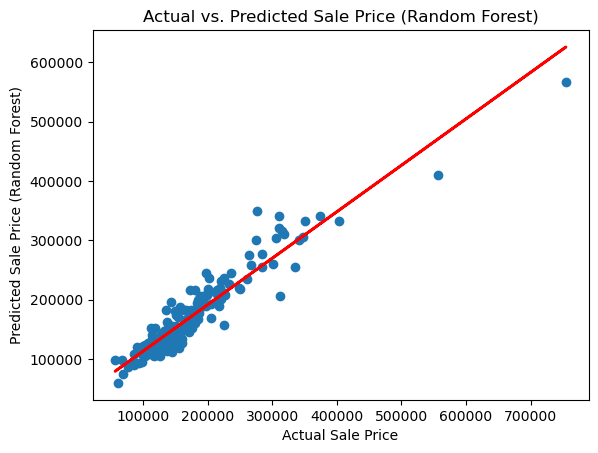

In [26]:
# scatter plot for actual vs. predicted Sale Price
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price (Random Forest)")
plt.title("Actual vs. Predicted Sale Price (Random Forest)")

# add line of best fit
fit_rf = np.polyfit(y_test, y_test_pred_rf, 1)
line_rf = np.poly1d(fit_rf)
plt.plot(y_test, line_rf(y_test), color="red", linewidth=2)

plt.show()

In [27]:
# r-squared and other metrics for Random Forest
print(f"Random Forest R-squared: {r2_score(y_test, y_test_pred_rf)}")
print(f"Random Forest Mean Squared Error: {mean_squared_error(y_test, y_test_pred_rf)}")
print(f"Random Forest Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_rf)}")
print(f"Random Forest Mean Percentage Error: {np.mean((y_test - y_test_pred_rf) / y_test) * 100}")

Random Forest R-squared: 0.8816955975743096
Random Forest Mean Squared Error: 799741186.497344
Random Forest Mean Absolute Error: 17092.83726775956
Random Forest Mean Percentage Error: -1.2880922892059161


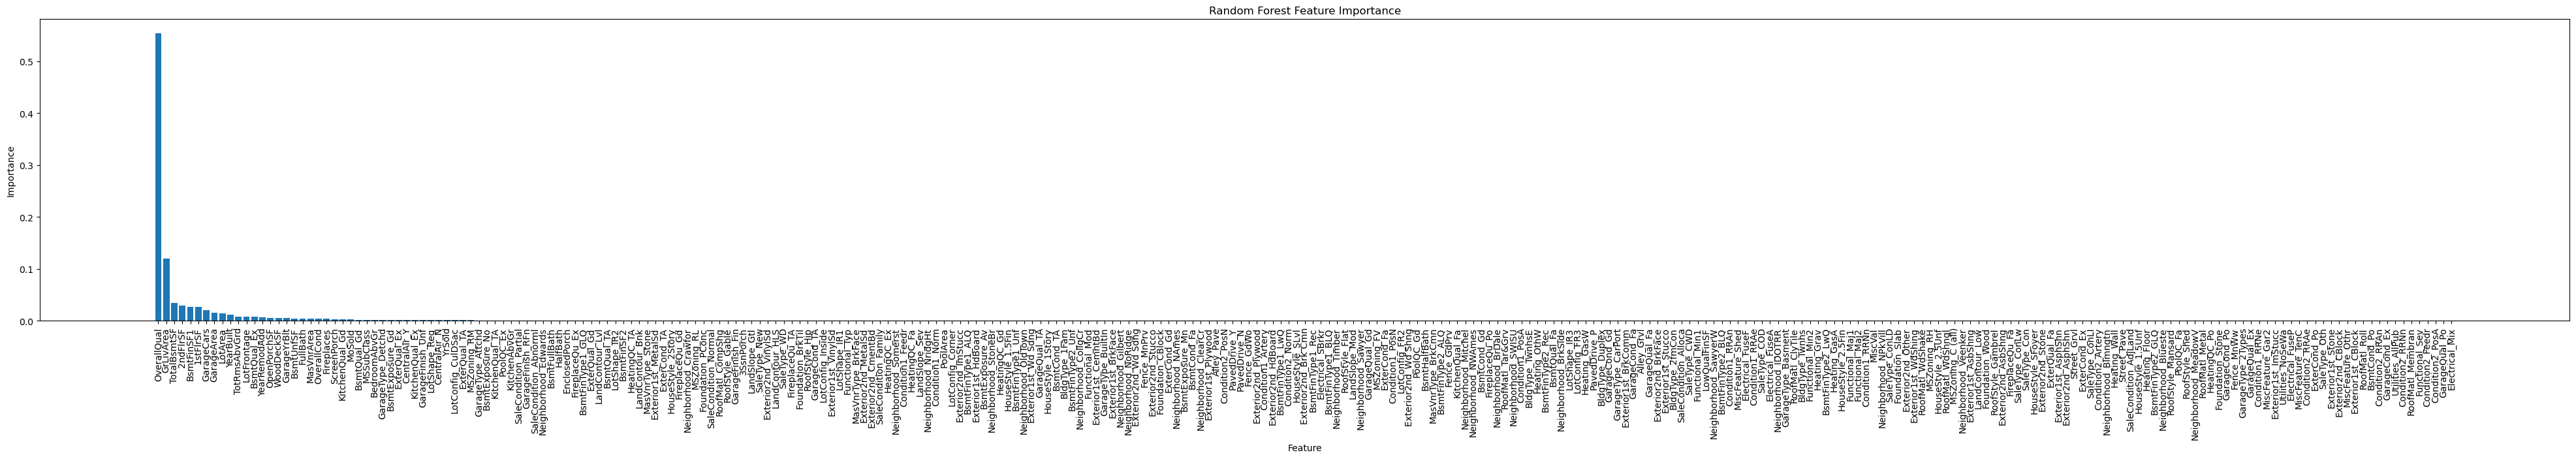

In [28]:
# plot random forest features
feature_importances = rf.feature_importances_

# cdreat df with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': dummies.drop(columns="SalePrice").columns, 'Importance': feature_importances})

# sort in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(50, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

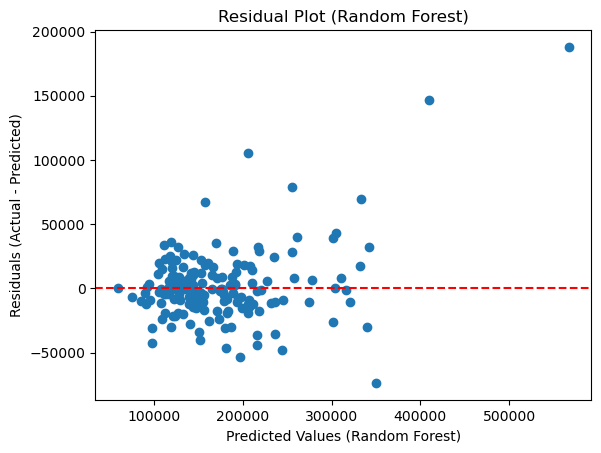

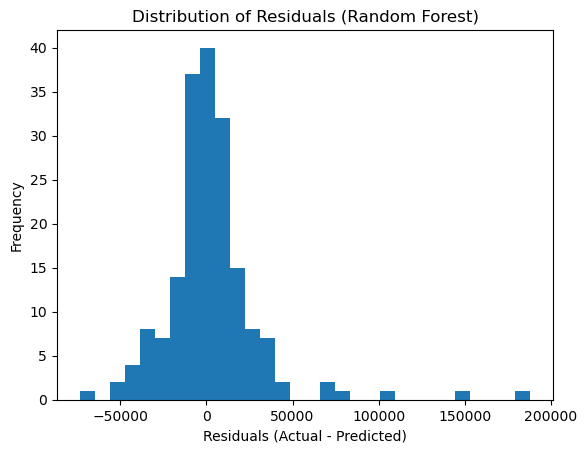

In [29]:
# plot residuals for Random Forest
residuals_rf = y_test - y_test_pred_rf

# scatter plot for residuals
plt.scatter(y_test_pred_rf, residuals_rf)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values (Random Forest)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.show()

# distribution of residuals
plt.hist(residuals_rf, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Random Forest)")
plt.show()